# Worksheet 06 22MS037

Adaptive time stepping for the Vanderpolt oscillator

$$\frac{d^2y}{dx^2} = \mu(1-y^2)\frac{dy}{dx} - \lambda y$$

In [2]:
import numpy as np
import matplotlib.pyplot as plt

## Q1 (a)

RK4 implementation

In [3]:
def rk4(y,x,h,f):
    '''
    Parameters
    ----------
    y : float
        initial value at (n-1) time step
    x : float
        initial value of independent variable
    h : float
        step size
    f : function
        the function on the right hand side of the differential equation using the Runge-Kutta 4 method
    
    Returns
    ---------
    returns the value of y at the next time step using the Runge-Kutta 4 method
    
    '''
    k1 = h*f(x,y)
    k2 = h*f(x+h/2,y+k1/2)
    k3 = h*f(x+h/2,y+k2/2)
    k4 = h*f(x+h,y+k3)
    y_n = y + (k1+2*k2+2*k3+k4)/6
    return y_n

def call(meth,a,b,N,y0,f): # call function Discretizes and generates method
    '''
    Parameters
    ----------
    meth : function
        the numerical method to be used
        'euler' for Euler method
        'midpoint' for Midpoint method
        'rk4' for Runge-Kutta 4 method
    a : float
        start time for differential equation solver
    b : float
        end time for differential equation solver
    N : int
        number of strips for discretization
    y0 : float
        initial value of differential equation solution
    f : function
        the function on the right hand side of the differential equation
    
    Returns
    ---------
    returns the value of y at each time step using the numerical method specified.
        
    '''
    h = (b-a)/(N-1)
    ys = np.zeros((N, len(y0)))
    y,ys[0] = y0,y0
    xs = np.arange(a,b+h/2,h)
    for i in range(N):
        ys[i,:] = y # to allow for vector solutions
        y = meth(y,xs[i],h,f)
    return ys

In [4]:
MU = 5
L = 40
def vdp(x,y):
    v = np.array([y[1],MU*(1-y[0]**2)*y[1] - L*y[0]])
    return v

In [5]:
a = 0 # t_initial 
b = 20# t final
h = 1e-4# step size
N = int(1+ (b-a)/h)
xval = np.arange(a,b+h/2,h)
y_ini = np.asarray([0.5, 0.0])  # Initial condition


In [6]:
y_rk4 = call(rk4,a,b,N,y_ini, f=vdp)


In [7]:
y_rk4.shape

(200001, 2)

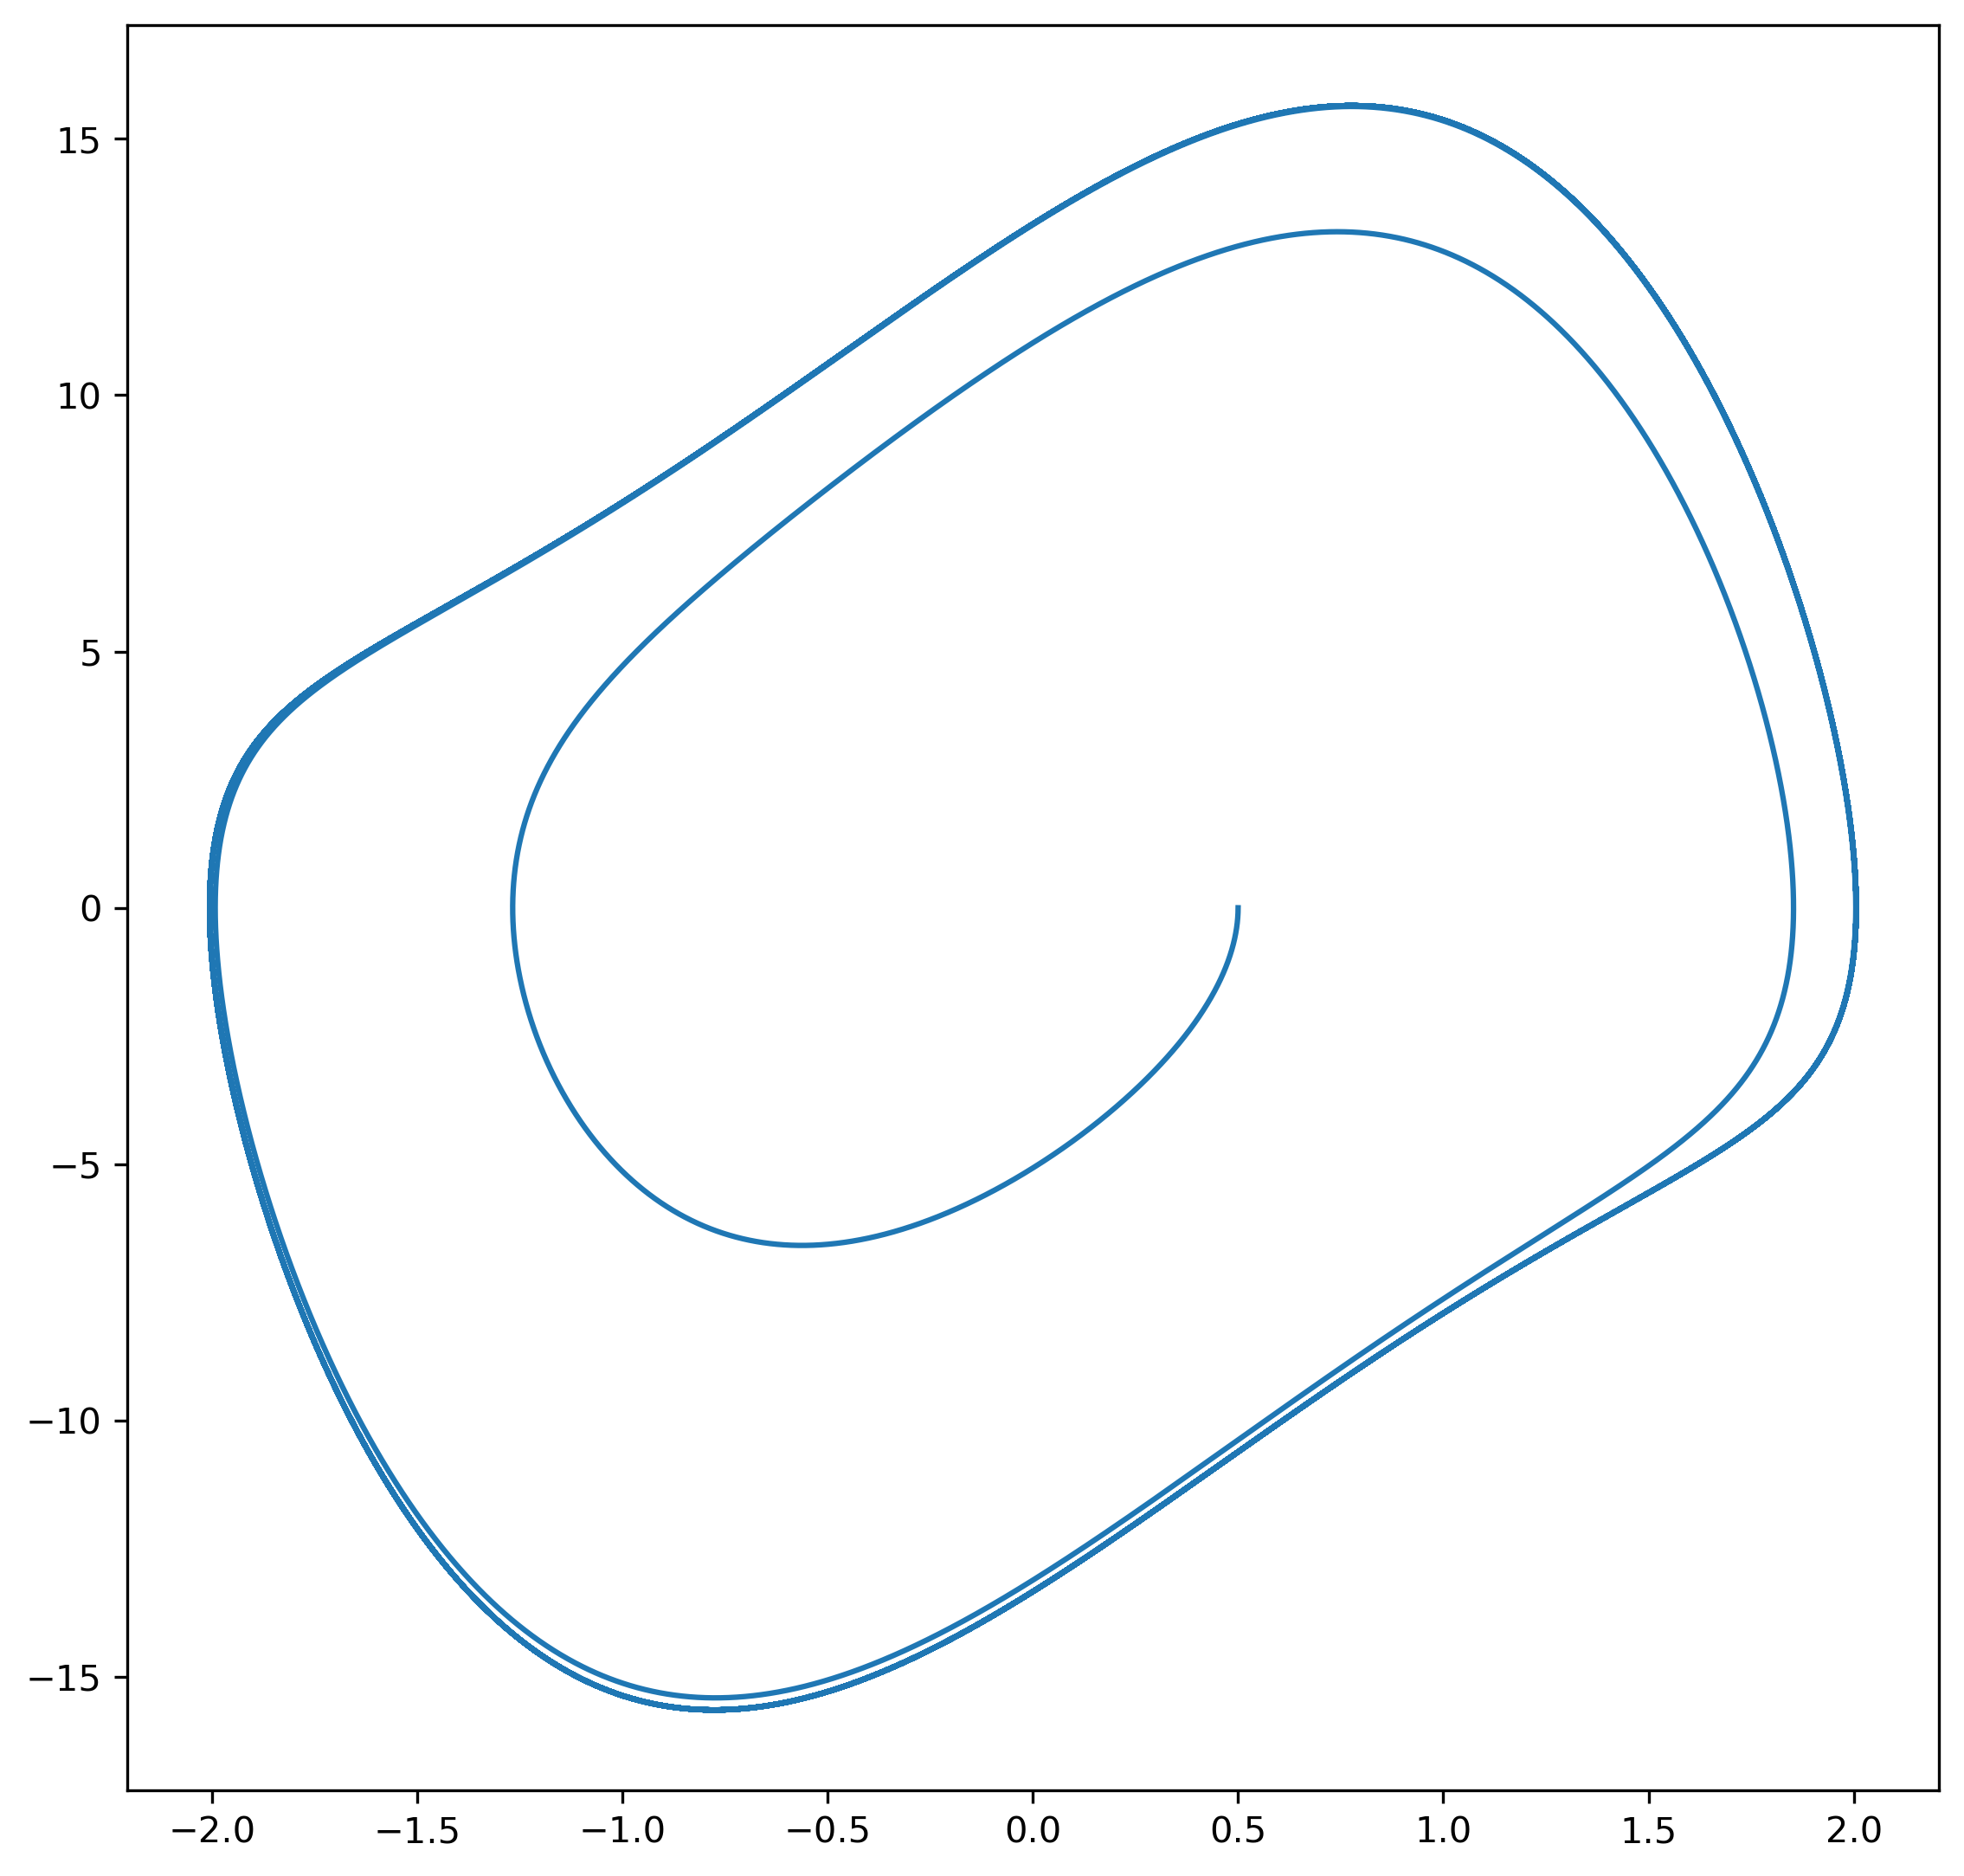

In [8]:
plt.figure(figsize=(9,9), dpi =300)
plt.plot(y_rk4[:,0], y_rk4[:,1])
# plt.plot(xval, y_rk4[:,0])

## Q1(b). Dormand Prince Method


In [9]:
a = [0.2, 0.3, 0.8, 8/9, 1.0, 1.0]
b = [
    [1/5, 0, 0, 0, 0, 0],
    [3/40, 9/40, 0, 0, 0, 0],
    [44/45, -56/15, 32/9, 0, 0, 0],
    [19372/6561, -25360/2187, 64448/6561, -212/729, 0, 0],
    [9017/3168, -355/33, 46732/5247, 49/176, -5103/18656, 0],
    [35/384, 0, 500/1113, 125/192, -2187/6784, 11/84]
]
c = [35/384, 0, 500/1113, 125/192, -2187/6784, 11/84, 0]

# Dormand-Prince
a2 = 1/5;  b21 = 1/5;
a3 = 3/10; b31 = 3/40;       b32 = 9/40;
a4 = 4/5;  b41 = 44/45;      b42 = -56/15;      b43 = 32/9;
a5 = 8/9;  b51 = 19372/6561; b52 = -25360/2187; b53 = 64448/6561; b54 =-212/729;
a6 = 1;    b61 = 9017/3168;  b62 = -355/33;     b63 = 46732/5247; b64 = 49/176;  b65 = -5103/18656;
a7 = 1;    b71 = 35/384;     b72 = 0;           b73 = 500/1113;   b74 = 125/192; b75 = -2187/6784;  b76 = 11/84;

c1 = 35/384; c2 = 0; c3 = 500/1113; c4 = 125/192; c5=-2187/6784; c6 = 11/84; c7 = 0;
c1s = 5179/57600; c2s = 0; c3s = 7571/16695; c4s = 393/640; c5s = -92097/339200; c6s = 187/2100; c7s = 1/40;

In [10]:
# Predictor-Corrector
# Embedded Runge-Kutta formulas
def erk54h(y, x, h, k7bh,f):
    # Implement FSAL (first same as last)
    # The first
    # k1 = k7bh, unless k1 is zero (initially)
    if sum(k7bh)==0: 
        k1 = h*f(x, y)
    else:
        k1 = k7bh*h

    # Implement rest of the Butcher table
    k2 = h*f(x + a2*h, y + b21*k1)
    k3 = h*f(x + a3*h, y + b31*k1 + b32*k2)
    k4 = h*f(x + a4*h, y + b41*k1 + b42*k2 + b43*k3)
    k5 = h*f(x + a5*h, y + b51*k1 + b52*k2 + b53*k3 + b54*k4)
    k6 = h*f(x + a6*h, y + b61*k1 + b62*k2 + b63*k3 + b64*k4 + b65*k5)

    # get y fifth-order correct
    y5 = y + c1*k1 + c2*k2 + c3*k3 + c4*k4 + c5*k5 + c6*k6 # c7 = 0     
    
    # FSAL -> the last
    k7bh = f(x + a7*h, y5)

    #@printf("%.6f %.6f %.6f %.6f\n",x, y[1], y5[1], k7bh[1])

    # get y fourth-order correct
    y4 = y + c1s*k1 + c2s*k2 + c3s*k3 + c4s*k4 + c5s*k5 + c6s*k6 + c7s*k7bh*h

    # return y, error, k7bh
    err = abs(y5 - y4)
    return y5, err, k7bh

In [12]:
def callerdp(a,b,h0,y0,f, max_iter, atol, rtol):
    '''
    Parameters
    ----------
    a : float
        start time for differential equation solver
    b : float
        end time for differential equation solver
    h0 : float
        the initial step size for the code
    y0 : float
        initial value of differential equation solution
    f : function
        the function on the right hand side of the differential equation
    max_iter : int
        maximum number of iterations to forbid extra lengthy loops
    atol : float
        absolute tolerance
    rtol : float
        relative tolerance
    
    Returns
    ---------
    returns the value of y at each time step using the numerical method specified and the time steps used
    using adaptive time stepping.
        
    '''
    ys = np.zeros((max_iter, len(y0)))
    xs = np.zeros(max_iter)
    y,ys[0] = y0,y0
    xs[0] = a
    x = a
    i = 0
    k7bh = np.zeros(len(y_ini))
    h = h0
    while x <= b and i < max_iter:
        
        if i==0:
            tol = atol + rtol*np.linalg.norm(ys[i,:])
        else:
            tol = atol + rtol*max([np.linalg.norm(ys[i,:]), np.linalg.norm(ys[i-1,:])])
        
        y, err, k7bh = erk54h(ys[i,:],xs[i],h,k7bh,f)
        
        max_err = max(err)
        
        if max_err == 0:
            max_err = tol/100
        
        if max_err <tol:
            x +=h
            i+=1
            xs[i] = x
            ys[i,:] = y
        h = 0.9*h*(tol/max_err)**(0.2)
        
        if i>=max_iter:
            print(i," Exceeded Max_iter, increase max_iter")
            return None
    
    # return the usable portion of the array
    return xs[1:i-1], ys[1:i-1,:]


In [13]:
a = 0 # t_initial 
b = 20# t final
h = 0.01# step size
y_ini = np.asarray([0.5, 0.0])  # Initial condition
atol = 1e-6
rtol = 1e-8
MAX_ITER = int(2*1e5)

In [14]:
[time, y] = callerdp(a,b,h,y_ini,vdp,MAX_ITER,atol,rtol)

In [15]:
len(time)

3125

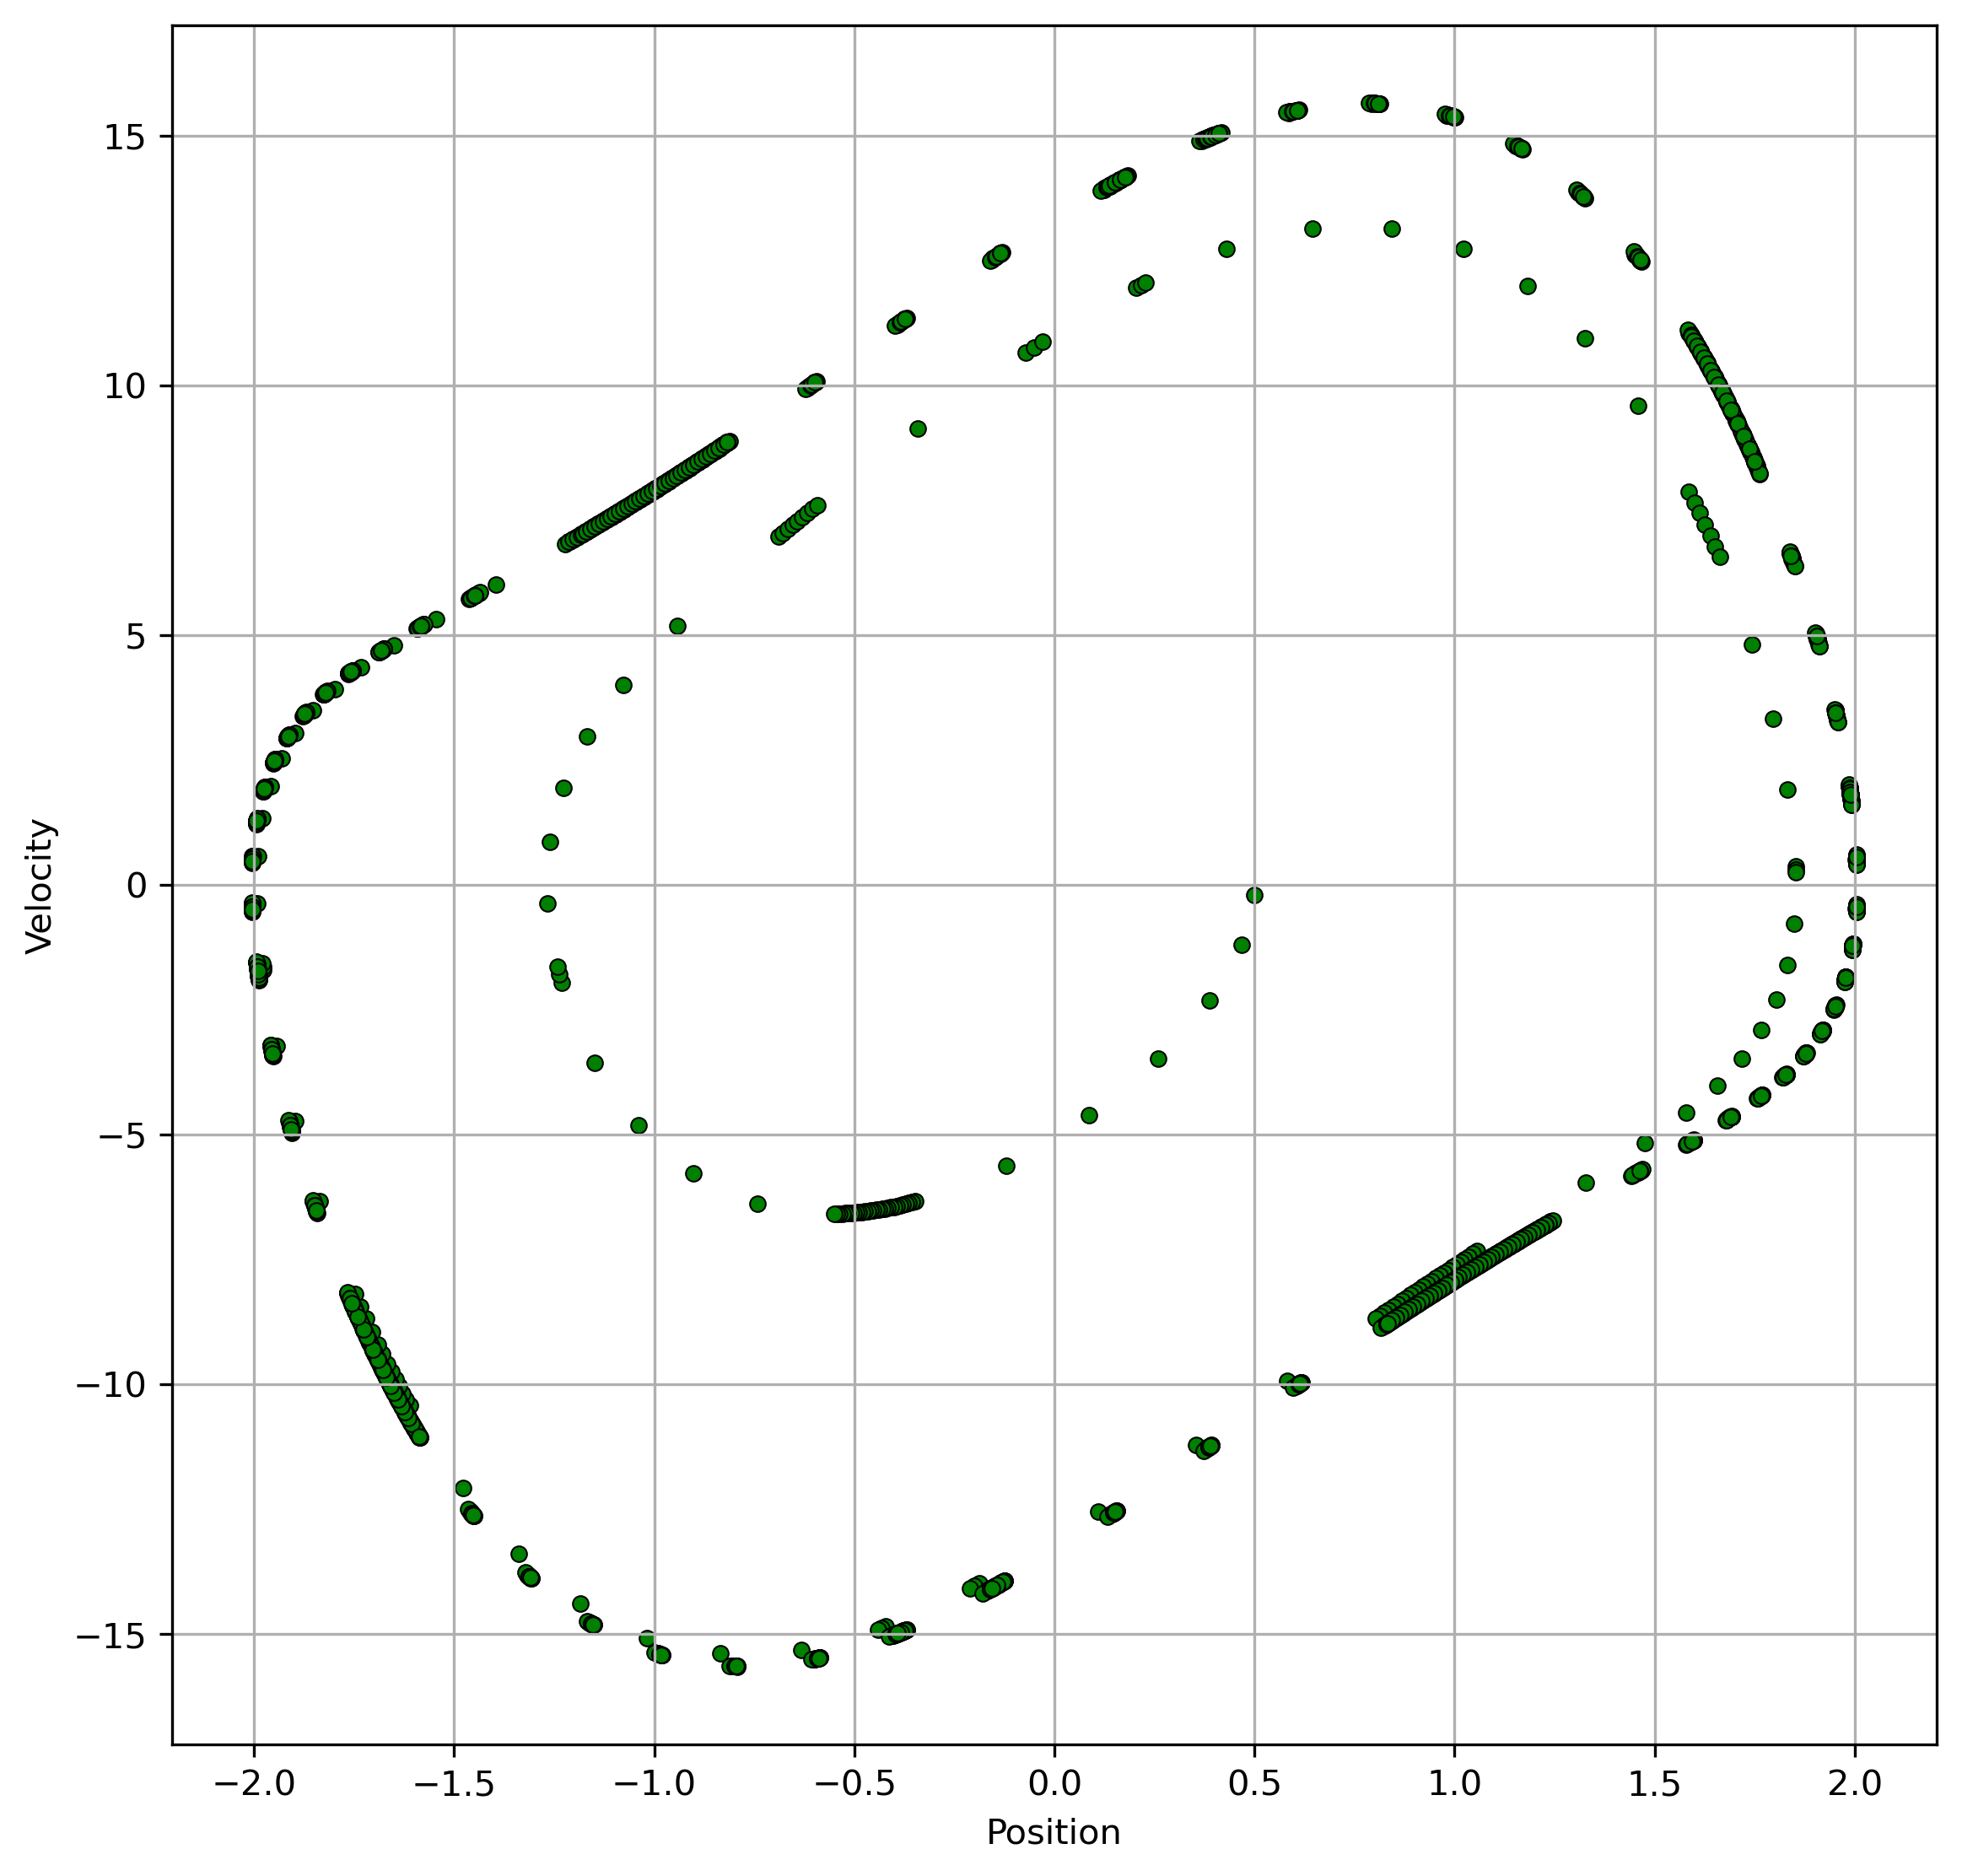

In [25]:
plt.figure(figsize=(9,9), dpi =300)
plt.scatter(y[:,0], y[:,1], s = 20, edgecolor='k', color='green', lw=0.5)
plt.xlabel("Position")
plt.ylabel("Velocity")
plt.grid();

## Q1. (c) Number of time steps

In [28]:
print("The Number of time steps taken in Runge-Kutta 4    -->",y_rk4.shape[0])
print("The Number of time steps taken in adaptive stepping-->", len(time))

The Number of time steps taken in Runge-Kutta 4    --> 200001
The Number of time steps taken in adaptive stepping--> 3125
